Vocab size: 35832
Vocab sample: [('the', 1), ('link', 2), ('a', 3), ('to', 4), ('this', 5), ('and', 6), ('li', 7), ('code', 8), ('href', 9), ('for', 10)]
            0         1         2         3         4         5         6   \
the   0.093891 -0.037662 -0.413430  0.404881  0.003013 -0.486482  0.411773   
link -0.049473  0.325224 -0.084635  1.111150  0.523763 -0.188431  0.110770   
a    -0.063133  0.695072 -0.314449  0.934845  0.217506  0.020758  0.097685   
to   -0.244268  0.066341 -0.366444  0.511691  0.425830 -0.378460 -0.027685   
this -0.482380  0.388689 -0.416925  0.082143  0.773172 -0.073811  0.451000   

            7         8         9   ...        90        91        92  \
the   0.166366  0.039857 -0.111558  ... -0.132813  0.067953  0.381048   
link  0.239287  0.163608  0.149672  ... -0.054802 -0.120080  1.036425   
a     0.266074  0.052528  0.066707  ... -0.120812 -0.174735  0.627173   
to    0.236013 -0.050840 -0.038744  ... -0.288278 -0.038495  0.331328   
this -0.4761

2022-01-02 22:26:58.496709: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-02 22:26:58.496834: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-02 22:26:58.497578: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


(35831, 35831)
{'code': ['runtime', 'parser', 'env', 'strong', 'async'], 'link': ['a', 'href', 'li', 'to', 'native'], 'fix': ['fixed', 'a', 'http', 'link', 'import'], 'bug': ['cleanup', 'longer', 'fixing', 'improvements', 'deprecation'], 'error': ['improve', 'py', 'css', 'command', 'element']}
Total words: 30 	Word Embedding shapes: (30, 100)


/home/conn/miniconda3/envs/GithubProject/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/conn/miniconda3/envs/GithubProject/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


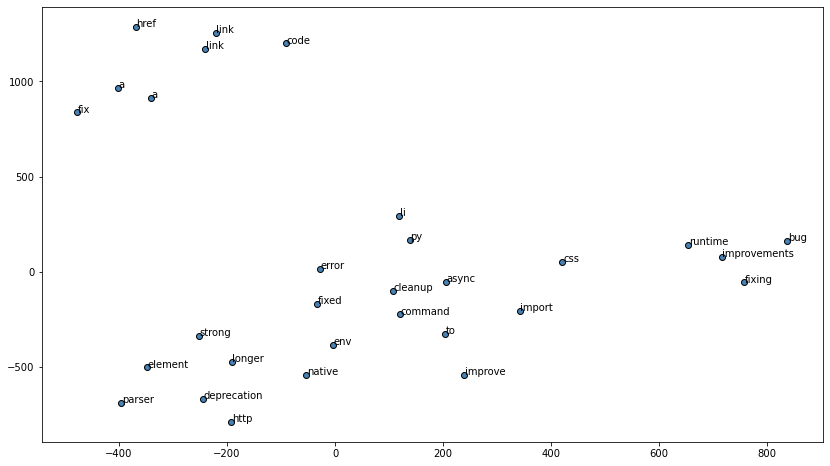

In [1]:
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing.sequence import skipgrams
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Reshape, Embedding, Dot, Input
from tensorflow.keras.models import Sequential, Model
import pandas as pd

def yield_strings(file_path='corpus.txt'):
    with open(file_path, 'r') as f:
        for line in f:
            yield line.strip()

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(yield_strings('corpus.txt'))

word2idx = tokenizer.word_index
idx2word = {v: k for k, v in word2idx.items()}

vocab_size = len(word2idx) + 1
embedding_dim = 100

word_ids = [[word2idx[w] for w in text.text_to_word_sequence(s)] for s in yield_strings('corpus.txt')]
print('Vocab size:', vocab_size)
print('Vocab sample:', list(word2idx.items())[:10])


# skip_grams = [skipgrams(word_id, vocabulary_size=vocab_size, window_size=10) for word_id in word_ids]
# pairs, labels = skip_grams[0][0], skip_grams[0][1]
# for i in range(10):
#     print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
#           idx2word[pairs[i][0]], pairs[i][0],
#           idx2word[pairs[i][1]], pairs[i][1],
#           labels[i]))
#
# word_input = Input(shape=(1,), dtype='int32')
# word_embedding = Embedding(vocab_size, embedding_dim,
#                          embeddings_initializer="glorot_uniform",
#                          input_length=1)(word_input)
# word_reshape = Reshape((embedding_dim,))(word_embedding)
#
# context_input = Input(shape=(1,), dtype='int32')
# context_embedding = Embedding(vocab_size, embedding_dim,
#                   embeddings_initializer="glorot_uniform",
#                   input_length=1)(context_input)
# context_reshape = Reshape((embedding_dim,))(context_embedding)
#
#
# dotted_layer = Dot(axes=1)([word_reshape, context_reshape])
# output_layer = Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid")(dotted_layer)
# skipgram_model = Model(inputs=[word_input, context_input], outputs=output_layer)
# skipgram_model.compile(loss="mean_squared_error", optimizer="rmsprop")
#
# print(skipgram_model.summary())
#
#
# for epoch in range(0, 5):
#     loss = 0
#     print("Epoch:", epoch)
#     for i, elem in enumerate(skip_grams):
#         if elem == ([], []):
#             continue
#         pair_first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
#         pair_second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
#         label_elem = np.array(elem[1], dtype='int32')
#         X = [pair_first_elem, pair_second_elem]
#         Y = label_elem
#         if i % 10000 == 0:
#             print('Processed {} (skip_first, skip_second, relevance) pairs'.format(i))
#             print('Loss:', loss)
#         loss += skipgram_model.train_on_batch(X, Y)
#     # merge_layer = skipgram_model.layers[0]
#     # word_embedding_weights = merge_layer.get_weights()[0]
#     # trained_word_model = merge_layer.layers[0]
#     # trained_word_model.save('models/word_model{}.h5'.format(epoch))
#     skipgram_model.save('models/skipgram_model{}.h5'.format(epoch))
#     print('Epoch:', epoch, 'Loss:', loss)
#
# # merge_layer = skipgram_model.layers[0]
# # word_embedding_weights = merge_layer.get_weights()[0]
# # trained_word_model = merge_layer.layers[0]
# # trained_word_model.save('models/word_model.h5')
# skipgram_model.save('models/skipgram_model.h5')
# print('Saved models')

model = load_model('models/skipgram_model.h5')
word_embedding_layer = model.get_layer(index=2)
word_embedding_weights = word_embedding_layer.get_weights()[0][1:]
print(pd.DataFrame(word_embedding_weights, index=idx2word.values()).head())
from sklearn.metrics.pairwise import euclidean_distances

distance_matrix = euclidean_distances(word_embedding_weights)
print(distance_matrix.shape)

similar_words = {search_term: [idx2word[idx] for idx in distance_matrix[word2idx[search_term]-1].argsort()[1:6]+1]
                   for search_term in ['code', 'link', 'fix', 'bug', 'error']}

print(similar_words)


from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words = sum([[k] + v for k, v in similar_words.items()], [])
words_ids = [word2idx[w] for w in words]
word_vectors = np.array([word_embedding_weights[idx] for idx in words_ids])
print('Total words:', len(words), '\tWord Embedding shapes:', word_vectors.shape)

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_vectors)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')